In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [9]:
df = pd.read_csv("D:/my pic/Iris.csv")


print("✅ Dataset Loaded")
print(df.head())
print("\nData Info:\n", df.info())


✅ Dataset Loaded
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB

Da

C:\Users\DELL\JupyterProject\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


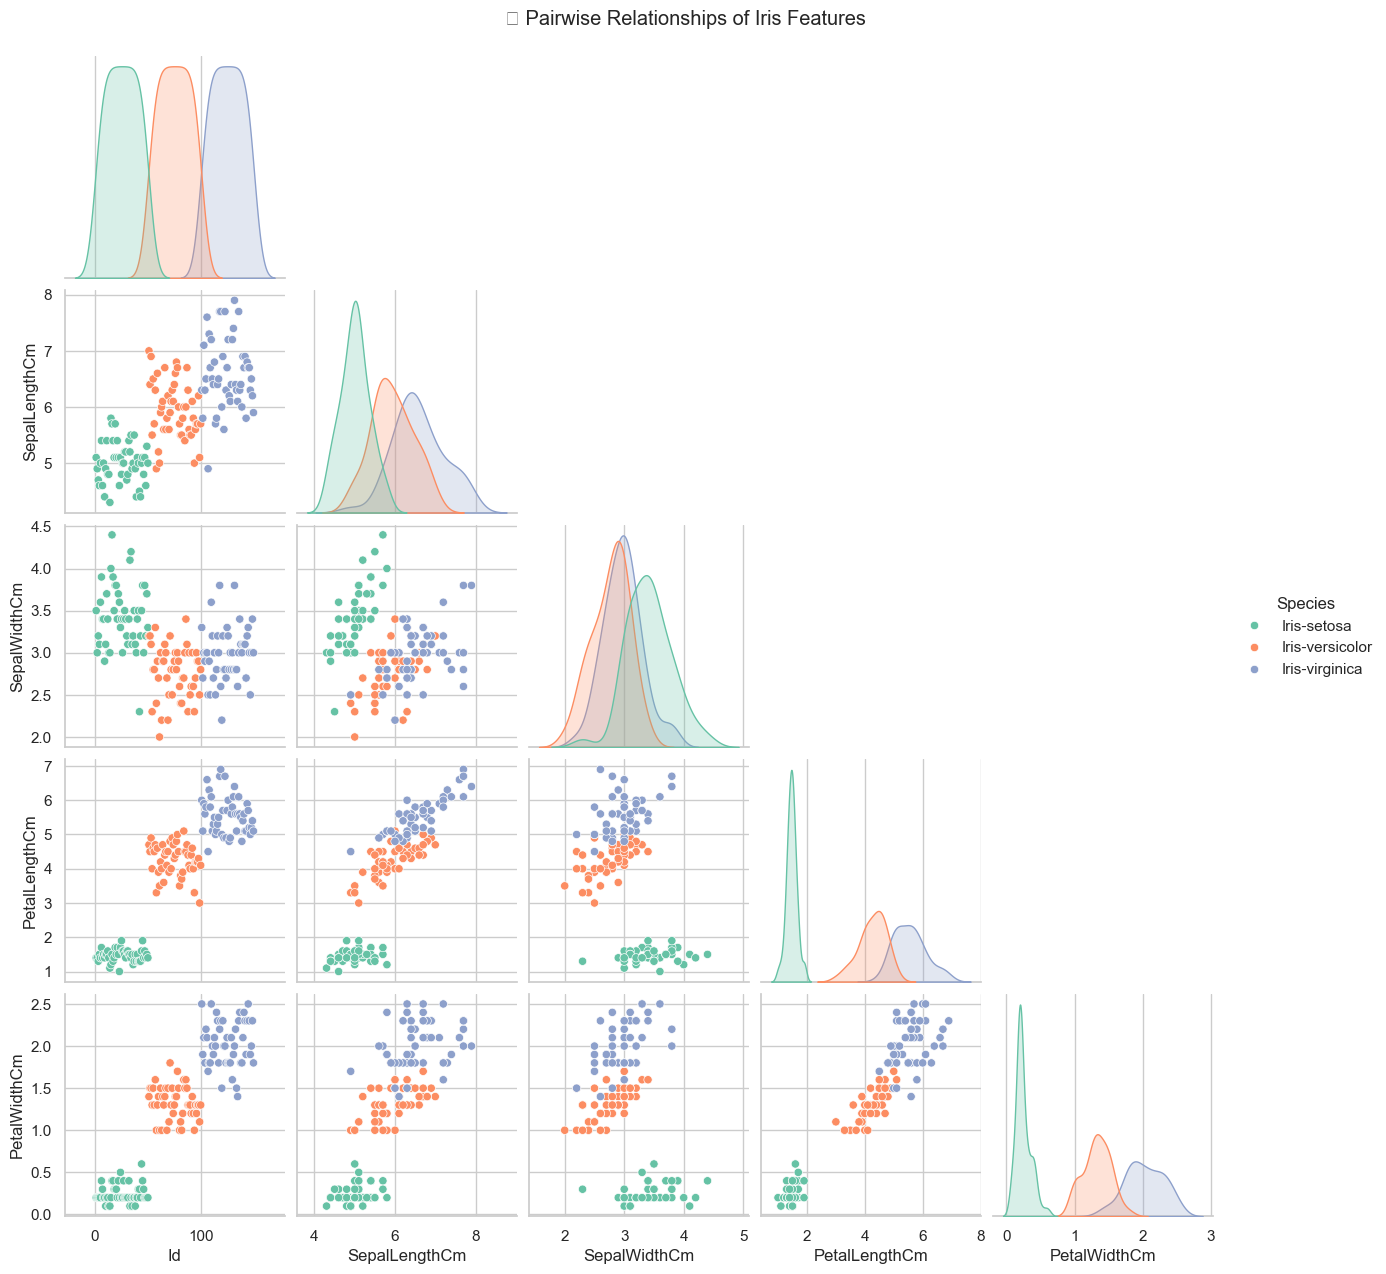

In [10]:
sns.pairplot(df, hue="Species", corner=True)
plt.suptitle("🌸 Pairwise Relationships of Iris Features", y=1.02)
plt.show()

C:\Users\DELL\JupyterProject\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


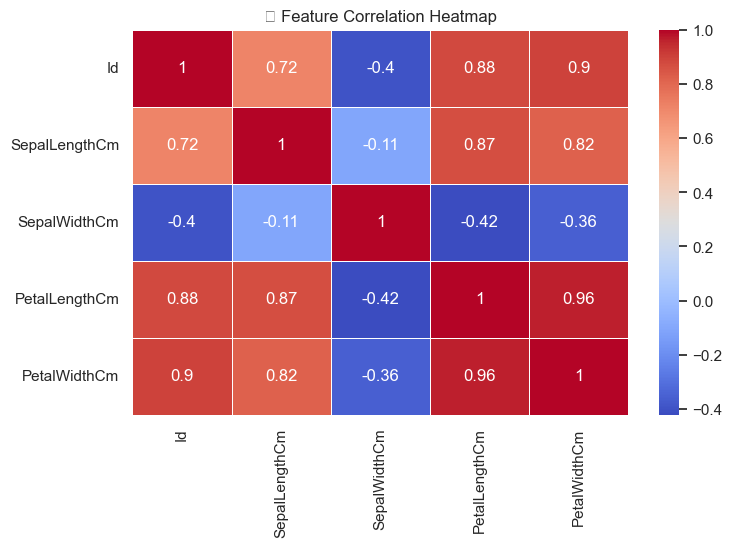

In [11]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("🔥 Feature Correlation Heatmap")
plt.show()

In [21]:
# ⚙️ Step 4: Prepare Data for Modeling
X = df.drop(['Id', 'Species'], axis=1)  # Features
y = df['Species']                        # Target

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling (important for SVM)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Print shapes to confirm
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# ✅ Optional: first 5 scaled rows
print("\nFirst 5 rows of scaled features:")
print(X_train[:5])


X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)

First 5 rows of scaled features:
[[-1.47393679  1.22037928 -1.5639872  -1.30948358]
 [-0.13307079  3.02001693 -1.27728011 -1.04292204]
 [ 1.08589829  0.09560575  0.38562104  0.28988568]
 [-1.23014297  0.77046987 -1.21993869 -1.30948358]
 [-1.7177306   0.32056046 -1.39196294 -1.30948358]]


In [14]:
models = {
    "Support Vector Machine": SVC(kernel='rbf', C=1, gamma='auto'),
    "Random Forest": RandomForestClassifier(n_estimators=120, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n🔹 {name} Accuracy: {acc*100:.2f}%")
    print(classification_report(y_test, y_pred))



🔹 Support Vector Machine Accuracy: 100.00%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


🔹 Random Forest Accuracy: 100.00%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [16]:
models = {
    "Support Vector Machine": SVC(kernel='rbf', C=1, gamma='auto'),
    "Random Forest": RandomForestClassifier(n_estimators=120, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n🔹 {name} Accuracy: {acc*100:.2f}%")
    print(classification_report(y_test, y_pred))



🔹 Support Vector Machine Accuracy: 100.00%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


🔹 Random Forest Accuracy: 100.00%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



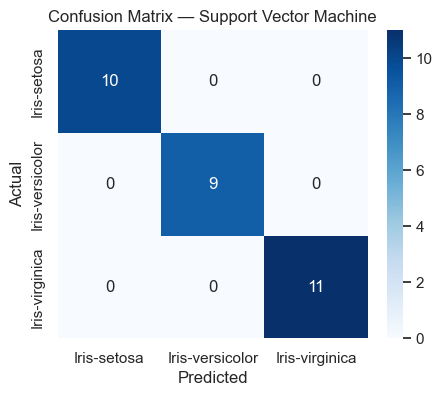

In [15]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=df['Species'].unique(),
            yticklabels=df['Species'].unique())
plt.title(f"Confusion Matrix — {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:
sample = np.array([[5.8, 2.9, 4.5, 1.3]])  # Replace with your own sample
predicted_species = best_model.predict(scaler.transform(sample))
print(f"\n🌸 Predicted Species for sample {sample}: {predicted_species[0]}")


🌸 Predicted Species for sample [[5.8 2.9 4.5 1.3]]: Iris-virginica


In [20]:
print("\n📊 Key Insights:")
print("1️⃣ Petal width and length are most important for classification.")
print(f"2️⃣ {best_model_name} gave the highest accuracy on this dataset.")
print("3️⃣ Dataset is clean and well-balanced across species.")
print("4️⃣ Visualizations highlight clear separation between species.")


📊 Key Insights:
1️⃣ Petal width and length are most important for classification.
2️⃣ Support Vector Machine gave the highest accuracy on this dataset.
3️⃣ Dataset is clean and well-balanced across species.
4️⃣ Visualizations highlight clear separation between species.
